# 07.03 - NEURAL NETWORKS

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from local.lib import mlutils
from IPython.display import Image
%matplotlib inline

## Reinterpreting logistic regression

observe how we can represent the same logistic regression expression we saw before. 

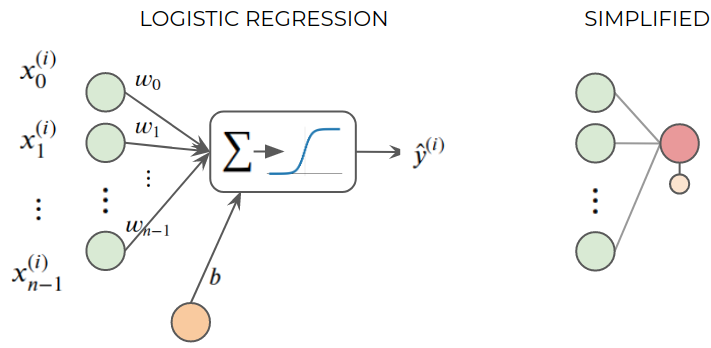

In [3]:
## KEEPOUTPUT
Image("local/imgs/logreg.png", width=600)

This also goes by the weird name of **[The Perceptron](https://en.wikipedia.org/wiki/Perceptron)**

W es el peso.

**Step function**: Funcion por intervalos.

**Funcion sigmoide**: Suavización (de las esquinas) de una función por intervalos  

Recall that **matrix and vector** multiplication and `numpy`**broadcasting** are very convenient to make this operation for a single element or for the full dataset.

$$\hat{y}^{(i)} = \text{sigm}(\mathbf{x}^{(i)}\cdot \mathbf{w}  + b)$$

$$\hat{\mathbf{y}} = \text{sigm}(\mathbf{X} \cdot \mathbf{w}  + b)$$

with 

$$\text{sigm}(z)=\frac{1}{1+e^{-z}}$$


See and understand this with the following random dataset ($\mathbf{X}$) and parameters ($\theta$).

$m$ is the number of data items we have (rows), and $n$ is the number of attributes per data point (columns). 

This can be seen as a **EXTREME SIMPLIFICATION** of a [biological neuron](https://en.wikipedia.org/wiki/Neuron).

Estos es una unidad logistica.

In [4]:
## KEEPOUTPUT
m,n = 1000,5
X = np.random.normal(size=(m,n))
t = np.random.normal(size=n)
b = np.random.normal()

sigmoid = lambda z: 1/(1+np.exp(-z))

print ("X\n",X)
print ("\n\nt\n", t)
print ("\n\nb\n", b)
X.shape, t.shape

X
 [[-0.60404178  0.76619017 -0.61068462 -0.21259751 -1.06940079]
 [-1.08737617  0.81256607  1.67505263 -0.34666928 -0.06797462]
 [ 1.06161238  2.01735519 -1.34935426  0.80815559  0.81429953]
 ...
 [-0.45941789 -0.48420509  0.75410757 -1.51038325 -0.08999642]
 [ 2.22775957 -1.33891847 -0.62419144 -0.80130482  1.88636079]
 [-0.9241129  -1.06789242 -0.52381008  0.49849034 -0.61265081]]


t
 [ 1.13878836  1.96966957  0.8851758  -0.42897005  0.9298237 ]


b
 0.5366194068206257


((1000, 5), (5,))

logistic regression prediction in one line of code for the full dataset

In [5]:
## KEEPOUTPUT
y_hat = sigmoid(X.dot(t)+b)

print (y_hat[:10])
y_hat.shape

[0.47855457 0.92179845 0.992862   0.17116147 0.96940066 0.28486747
 0.28235958 0.99917917 0.3019508  0.47965762]


(1000,)

## Neural networks $\rightarrow$ Assembling logistic regression units

we can have several perceptrons together from the same input

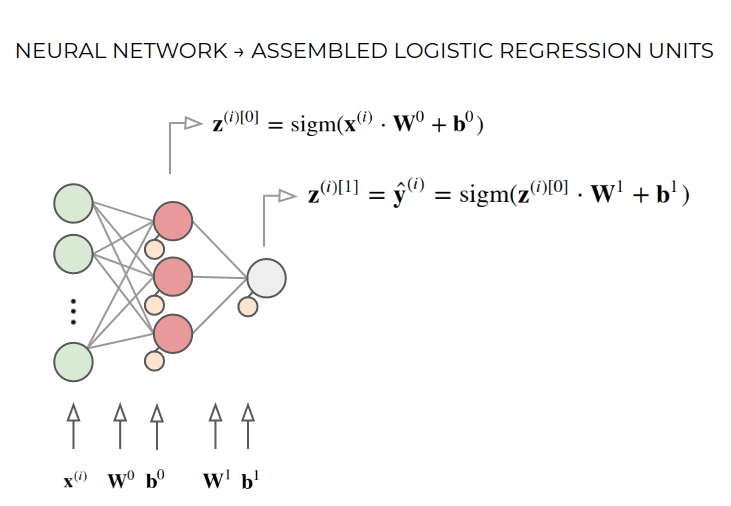

In [6]:
## KEEPOUTPUT
Image("local/imgs/mlp.png", width=600)

what are the sizes of the  symbols above? **HINT**: Matrix multiplication has to match up.

- $\mathbf{x}^{(i)} \;\;\;\in \mathbb{R}^n$
- $\mathbf{W}^0 \;\;\;\in \mathbb{R}^{n\times 3}\rightarrow\;\;$each column contains the weights of one logistic regression unit.
- $\mathbf{b}^0 \;\;\;\;\in \mathbb{R}^3\;\;\;\rightarrow\;\;$one per logistic regression unit.
- $\mathbf{z}^{(i)[0]} \in \mathbb{R}^3\;\;\;\rightarrow\;\;$one output per logistic regression unit.
- $\mathbf{W}^1 \;\;\in \mathbb{R}^{3}\;\;\;\rightarrow\;\;$this is a regular logistic regression unit, but its input comes from the previous layer.
- $\mathbf{b}^1 \; \;\;\in \mathbb{R}\;\;\;\;\;\rightarrow\;\;$like a regular logistic regression unit.
- $\hat{y}^{(i)}\; \;\in \mathbb{R}\;\;\;\;\;\rightarrow\;\;$the network output

we can have different activations functions

- $\mathbf{z}^{(i)[0]} = \text{tanh}(\mathbf{x}^{(i)}\cdot \mathbf{W}^0+\mathbf{b}^0)$
- $\mathbf{z}^{(i)[1]} = \hat{\mathbf{y}}^{(i)} = \text{sigm}(\mathbf{z}^{(i)[0]}\cdot \mathbf{W}^1+\mathbf{b}^1)$


In [7]:
sigmoid = lambda z: 1/(1+np.exp(-z))
relu    = lambda z: z*(z>0)

Text(0.5, 1.0, 'relu function')

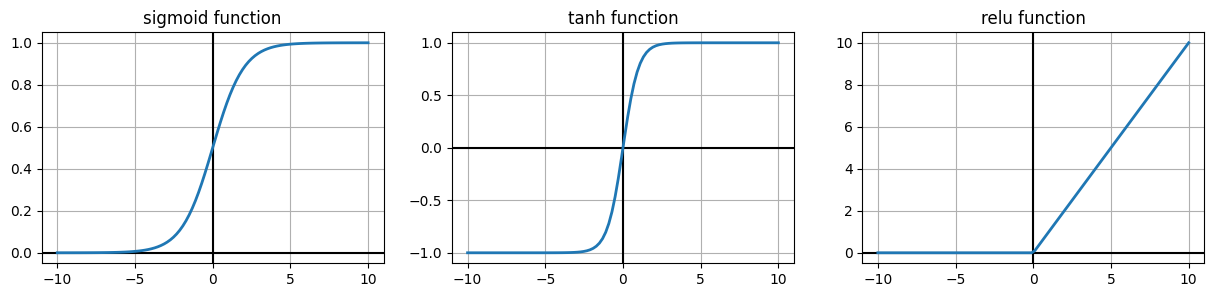

In [8]:
## KEEPOUTPUT
xr = np.linspace(-10,10,100)
plt.figure(figsize=(15,3))
plt.subplot(131)
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.plot(xr, sigmoid(xr) ,lw=2)
plt.grid();
plt.title("sigmoid function")

plt.subplot(132)
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.plot(xr, np.tanh(xr) ,lw=2)
plt.grid();
plt.title("tanh function")

plt.subplot(133)
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.plot(xr, relu(xr) ,lw=2)
plt.grid();
plt.title("relu function")

in general 

- $\text{sigm}$ is good for output units (can be interpreted as probability)
- $\text{tanh}$ is good for hidden layers in small networks (neg and pos contributions)
- $\text{relu}$ is good for hidden layers is large (deep learning) networks (easier to train)



**Observe** the capacity of neural networks to create classification frontiers.

The following set of weights were obtained **AFTER** training a neural network with the [sklearn moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset:

- input data has two columns
- the hidden layer has four neurons (logistic units)

Try to understant **the shapes** as we are computing ALL predictions for a dataset **SIMULTANEOUSLY**, using `numpy` vectorized operations.

In [9]:
## KEEPOUTPUT
b0,b1,W0,W1 = (np.array([-12.89987776,  10.35173209,  11.65978321,  -7.55016811]),
              -17.36405931876728,
 np.array([[19.04548787, -8.65065699, 14.28282749, -9.44291219],
        [15.44773976,  5.09753522, -3.12074945, 10.5002505 ]]),
 np.array([-42.17763359,-34.87459471, 7.21432064,-36.52606503]))

print ("W0:\n",W0)
print ("\nb0:\n",b0)
print ("\nW1:\n",W1)
print ("\nb1:\n",b1)

W0.shape, b0.shape, W1.shape, type(b1)

W0:
 [[19.04548787 -8.65065699 14.28282749 -9.44291219]
 [15.44773976  5.09753522 -3.12074945 10.5002505 ]]

b0:
 [-12.89987776  10.35173209  11.65978321  -7.55016811]

W1:
 [-42.17763359 -34.87459471   7.21432064 -36.52606503]

b1:
 -17.36405931876728


((2, 4), (4,), (4,), float)

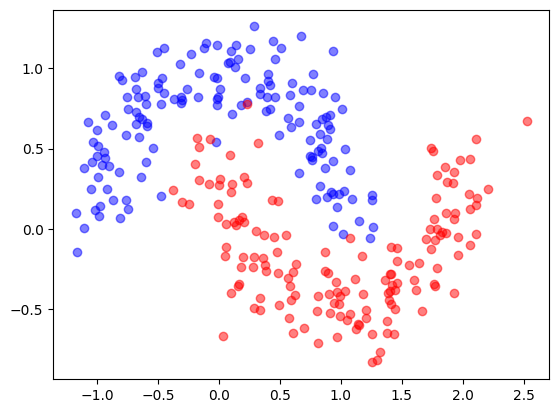

In [10]:
## KEEPOUTPUT
from sklearn.datasets import make_moons
X,y = make_moons(300, noise=.15)
plt.scatter(X[:,0][y==0], X[:,1][y==0], color="blue", label="class 0", alpha=.5)
plt.scatter(X[:,0][y==1], X[:,1][y==1], color="red", label="class 1", alpha=.5)

This is the **NEURAL NETWORK** prediction function. Observe the output is a sigmoid function and we convert it into a [0,1] classification prediction by simply threholding it at 0.5. See the sigmoid function graph above to understand why.

In [11]:
predict = lambda X: (sigmoid(np.tanh(X.dot(W0)+b0).dot(W1)+b1)>.5).astype(int)

In [12]:
from local.lib import mlutils

(0.401125, 0.598875)

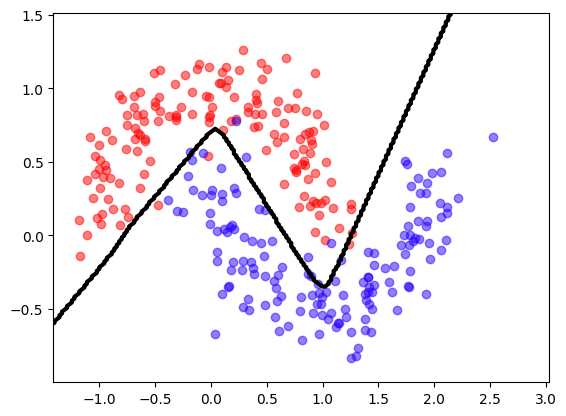

In [13]:
## KEEPOUTPUT
mlutils.plot_2Ddata_with_boundary(predict, X, y)